<a href="https://colab.research.google.com/github/prakanshurockss/Colab/blob/main/03_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/opt/conda/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F056C14CF40>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


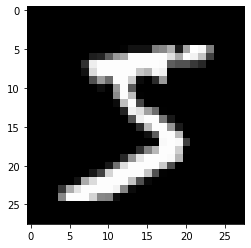

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


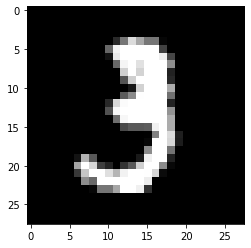

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


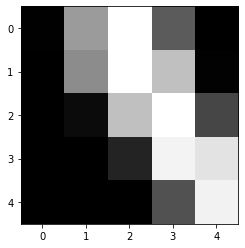

In [ ]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
# Install the library
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit(project='03-logistic-regression-live')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Of course, this model is a lot larger than our previous model in terms of the number of parameters. Let's take a look at the weights and biases.

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0009, -0.0116, -0.0353,  ...,  0.0250,  0.0174, -0.0170],
        [ 0.0273, -0.0075, -0.0141,  ..., -0.0279,  0.0321,  0.0207],
        [ 0.0115,  0.0028,  0.0332,  ...,  0.0286, -0.0246, -0.0237],
        ...,
        [-0.0151,  0.0339,  0.0293,  ...,  0.0080, -0.0065,  0.0281],
        [-0.0011,  0.0064,  0.0177,  ..., -0.0050,  0.0324, -0.0150],
        [ 0.0147, -0.0001, -0.0042,  ..., -0.0102,  0.0343, -0.0263]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0080,  0.0105, -0.0150, -0.0245,  0.0057, -0.0085,  0.0240,  0.0297,
         0.0087,  0.0296], requires_grad=True)

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([9, 5, 0, 5, 0, 2, 6, 1, 3, 1, 5, 5, 6, 9, 4, 5, 5, 8, 7, 1, 2, 5, 3, 4,
        9, 6, 2, 2, 2, 3, 5, 7, 3, 9, 9, 3, 9, 7, 5, 4, 3, 6, 2, 8, 3, 3, 1, 1,
        0, 9, 8, 2, 0, 8, 5, 4, 5, 9, 4, 9, 0, 2, 4, 9, 9, 6, 2, 2, 5, 8, 7, 8,
        3, 8, 7, 1, 7, 2, 5, 1, 6, 5, 7, 8, 0, 4, 8, 6, 3, 9, 6, 7, 8, 9, 2, 2,
        7, 5, 4, 0, 7, 9, 1, 7, 0, 7, 3, 2, 4, 6, 8, 5, 0, 7, 2, 3, 7, 6, 0, 1,
        7, 0, 6, 7, 7, 5, 8, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [ ]:
class Person:
    # Class constructor
    def __init__(self, name, age):
        # Object properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is " + self.name + "!")

Here's how we create or _instantiate_ an object of the class `Person`.

In [ ]:
bob = Person("Bob", 32)

The object `bob` is an instance of the class `Person`. 

We can access the object's properties (also called attributes) or invoke its methods using the `.` notation.

In [ ]:
bob.name, bob.age

('Bob', 32)

In [ ]:
bob.say_hello()

Hello my name is Bob!


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0090, -0.0159, -0.0224,  ..., -0.0215,  0.0283, -0.0320],
         [ 0.0287, -0.0217, -0.0159,  ..., -0.0089, -0.0199, -0.0269],
         [ 0.0217,  0.0316, -0.0253,  ...,  0.0336, -0.0165,  0.0027],
         ...,
         [ 0.0079, -0.0068, -0.0282,  ..., -0.0229,  0.0235,  0.0244],
         [ 0.0199, -0.0111, -0.0084,  ..., -0.0271, -0.0252,  0.0264],
         [-0.0146,  0.0340, -0.0004,  ...,  0.0189,  0.0017,  0.0197]],
        requires_grad=True), Parameter containing:
 tensor([-0.0108,  0.0181, -0.0022,  0.0184, -0.0075, -0.0040, -0.0157,  0.0221,
         -0.0005,  0.0039], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works.

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0967,  0.2726, -0.0690, -0.0207, -0.3350,  0.2693,  0.2956, -0.1389,
          0.0620, -0.0604],
        [-0.0071,  0.1541, -0.0696, -0.0508, -0.2197,  0.1108,  0.0263, -0.0490,
          0.0100, -0.1085]])


In [ ]:
import torch.nn.functional as F

The softmax function is included in the `torch.nn.functional` package and requires us to specify a dimension along which the function should be applied.

In [ ]:
outputs[:2]

tensor([[ 0.0967,  0.2726, -0.0690, -0.0207, -0.3350,  0.2693,  0.2956, -0.1389,
          0.0620, -0.0604],
        [-0.0071,  0.1541, -0.0696, -0.0508, -0.2197,  0.1108,  0.0263, -0.0490,
          0.0100, -0.1085]], grad_fn=<SliceBackward>)

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1042, 0.1242, 0.0883, 0.0927, 0.0677, 0.1238, 0.1271, 0.0823, 0.1006,
         0.0890],
        [0.1008, 0.1185, 0.0947, 0.0965, 0.0815, 0.1134, 0.1042, 0.0967, 0.1026,
         0.0911]])
Sum:  1.0


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 1, 6, 1, 5, 1, 0, 5, 5, 6, 5, 5, 1, 4, 6, 5, 1, 6, 0, 6, 4, 1, 5, 1,
        5, 5, 5, 1, 2, 5, 3, 5, 5, 0, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5, 8, 1, 5, 4,
        0, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 5, 6, 5, 1, 1, 5, 5, 5, 5, 0, 5, 5, 9,
        0, 3, 5, 3, 5, 5, 5, 6, 5, 5, 0, 9, 5, 5, 0, 8, 2, 3, 1, 1, 1, 5, 5, 0,
        1, 1, 5, 2, 1, 1, 5, 0, 5, 0, 1, 5, 1, 5, 1, 5, 5, 2, 1, 5, 1, 5, 0, 4,
        5, 3, 5, 5, 1, 0, 0, 5])
tensor([0.1271, 0.1185, 0.1188, 0.1175, 0.1220, 0.1229, 0.1318, 0.1710, 0.1210,
        0.1396, 0.1285, 0.1397, 0.1276, 0.1250, 0.1390, 0.1707, 0.1208, 0.1291,
        0.1232, 0.1262, 0.1235, 0.1293, 0.1354, 0.1374, 0.1518, 0.1911, 0.1292,
        0.1317, 0.1381, 0.1327, 0.1189, 0.1326, 0.1310, 0.1183, 0.1467, 0.1130,
        0.1292, 0.1280, 0.1329, 0.1276, 0.1552, 0.1281, 0.1146, 0.1223, 0.1201,
        0.1321, 0.1272, 0.1356, 0.1205, 0.1410, 0.1164, 0.1287, 0.1425, 0.1222,
        0.1364, 0.1418, 0.1303, 0.1262, 0.1371, 0.1371, 0.1306, 0.1278, 0.1461,
       

The numbers printed above are the predicted labels for the first batch of training images. Let's compare them with the actual labels.

In [ ]:
labels

tensor([7, 4, 7, 0, 3, 4, 0, 0, 1, 6, 1, 3, 4, 1, 7, 0, 3, 7, 7, 7, 3, 4, 0, 6,
        0, 8, 1, 0, 3, 9, 9, 1, 9, 4, 0, 9, 0, 9, 6, 9, 8, 4, 3, 5, 9, 0, 6, 2,
        8, 7, 1, 4, 6, 9, 9, 5, 2, 5, 6, 5, 7, 3, 9, 6, 4, 1, 7, 5, 5, 1, 5, 1,
        9, 0, 8, 0, 0, 1, 5, 0, 8, 7, 2, 5, 5, 1, 6, 4, 6, 1, 0, 6, 3, 4, 6, 5,
        9, 9, 9, 5, 6, 0, 6, 7, 4, 9, 6, 6, 0, 7, 0, 1, 1, 3, 0, 4, 6, 1, 2, 1,
        9, 8, 0, 1, 9, 9, 7, 2])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.

## Evaluation Metric and Loss Function

Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly, i.e,. the **accuracy** of the predictions. 

In [ ]:
outputs[:2]

tensor([[ 0.0967,  0.2726, -0.0690, -0.0207, -0.3350,  0.2693,  0.2956, -0.1389,
          0.0620, -0.0604],
        [-0.0071,  0.1541, -0.0696, -0.0508, -0.2197,  0.1108,  0.0263, -0.0490,
          0.0100, -0.1085]], grad_fn=<SliceBackward>)

In [ ]:
torch.sum(preds == labels)

tensor(8)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0625)

In [ ]:
probs

tensor([[0.1042, 0.1242, 0.0883,  ..., 0.0823, 0.1006, 0.0890],
        [0.1008, 0.1185, 0.0947,  ..., 0.0967, 0.1026, 0.0911],
        [0.1068, 0.1054, 0.0947,  ..., 0.0934, 0.0954, 0.1085],
        ...,
        [0.1272, 0.1103, 0.0895,  ..., 0.0855, 0.0862, 0.0724],
        [0.1217, 0.1118, 0.0835,  ..., 0.1021, 0.0868, 0.0902],
        [0.1187, 0.1228, 0.0938,  ..., 0.1113, 0.0703, 0.0696]],
       grad_fn=<SoftmaxBackward>)

In [ ]:
outputs

tensor([[ 0.0967,  0.2726, -0.0690,  ..., -0.1389,  0.0620, -0.0604],
        [-0.0071,  0.1541, -0.0696,  ..., -0.0490,  0.0100, -0.1085],
        [ 0.1534,  0.1400,  0.0330,  ...,  0.0190,  0.0402,  0.1687],
        ...,
        [ 0.2329,  0.0904, -0.1192,  ..., -0.1642, -0.1564, -0.3309],
        [ 0.2128,  0.1280, -0.1647,  ...,  0.0371, -0.1255, -0.0866],
        [ 0.2251,  0.2591, -0.0102,  ...,  0.1606, -0.2983, -0.3083]],
       grad_fn=<AddmmBackward>)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3418, grad_fn=<NllLossBackward>)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
l1 = [1, 2, 3, 4, 5]

In [ ]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.



In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.10977056622505188, 'val_loss': 2.3349318504333496}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results.

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9552, val_acc: 0.6153
Epoch [1], val_loss: 1.6839, val_acc: 0.7270
Epoch [2], val_loss: 1.4819, val_acc: 0.7587
Epoch [3], val_loss: 1.3295, val_acc: 0.7791
Epoch [4], val_loss: 1.2124, val_acc: 0.7969


That's a great result! With just 5 epochs of training, our model has reached an accuracy of over 80% on the validation set. Let's see if we can improve that by training for a few more epochs. Try changing the learning rates and number of epochs in each of the cells below.

In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1205, val_acc: 0.8081
Epoch [1], val_loss: 1.0467, val_acc: 0.8165
Epoch [2], val_loss: 0.9862, val_acc: 0.8237
Epoch [3], val_loss: 0.9359, val_acc: 0.8281
Epoch [4], val_loss: 0.8934, val_acc: 0.8322


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8569, val_acc: 0.8371
Epoch [1], val_loss: 0.8254, val_acc: 0.8393
Epoch [2], val_loss: 0.7977, val_acc: 0.8420
Epoch [3], val_loss: 0.7733, val_acc: 0.8447
Epoch [4], val_loss: 0.7515, val_acc: 0.8470


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7320, val_acc: 0.8494
Epoch [1], val_loss: 0.7144, val_acc: 0.8512
Epoch [2], val_loss: 0.6985, val_acc: 0.8528
Epoch [3], val_loss: 0.6839, val_acc: 0.8543
Epoch [4], val_loss: 0.6706, val_acc: 0.8557


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

In [ ]:
jovian.log_metrics(val_acc=history[-1]['val_acc'], val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [ ]:
jovian.commit(project='03-logistic-regression', environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/aakashns/03-logistic-regression


'https://jovian.ai/aakashns/03-logistic-regression'

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


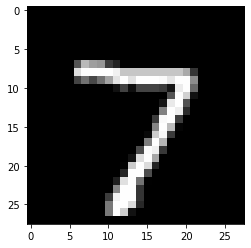

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


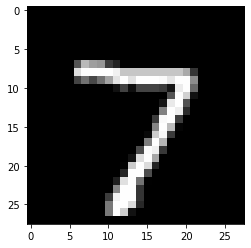

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


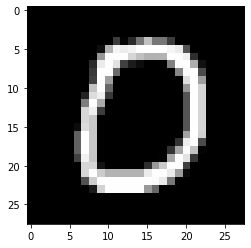

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


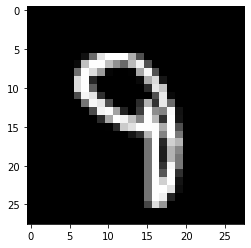

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


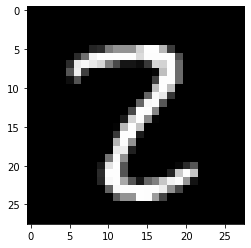

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.86083984375, 'val_loss': 0.6424765586853027}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0057,  0.0222, -0.0220,  ..., -0.0021, -0.0115, -0.0308],
                      [-0.0353,  0.0083, -0.0307,  ...,  0.0345, -0.0087,  0.0200],
                      [ 0.0104,  0.0158,  0.0225,  ...,  0.0255,  0.0227, -0.0346],
                      ...,
                      [-0.0097, -0.0173, -0.0154,  ...,  0.0025, -0.0274, -0.0276],
                      [ 0.0272, -0.0156,  0.0029,  ...,  0.0217,  0.0286, -0.0114],
                      [-0.0018, -0.0293, -0.0191,  ..., -0.0297,  0.0291,  0.0212]])),
             ('linear.bias',
              tensor([-0.0322,  0.1078, -0.0008, -0.0159,  0.0346,  0.0235, -0.0047,  0.0277,
                      -0.0684, -0.0356]))])

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0168, -0.0088, -0.0010,  ..., -0.0233,  0.0253,  0.0161],
                      [-0.0139, -0.0039,  0.0011,  ...,  0.0178, -0.0125, -0.0090],
                      [-0.0341, -0.0001,  0.0089,  ..., -0.0282,  0.0181,  0.0251],
                      ...,
                      [-0.0274, -0.0289, -0.0180,  ..., -0.0197, -0.0173,  0.0262],
                      [ 0.0318,  0.0125,  0.0178,  ..., -0.0192,  0.0083, -0.0032],
                      [-0.0264, -0.0261,  0.0058,  ..., -0.0005,  0.0135,  0.0287]])),
             ('linear.bias',
              tensor([ 0.0014, -0.0254, -0.0085, -0.0081, -0.0333,  0.0109, -0.0128, -0.0342,
                       0.0204,  0.0232]))])

In [ ]:
evaluate(model2, test_loader)

{'val_acc': 0.08339843899011612, 'val_loss': 2.325232744216919}

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0057,  0.0222, -0.0220,  ..., -0.0021, -0.0115, -0.0308],
                      [-0.0353,  0.0083, -0.0307,  ...,  0.0345, -0.0087,  0.0200],
                      [ 0.0104,  0.0158,  0.0225,  ...,  0.0255,  0.0227, -0.0346],
                      ...,
                      [-0.0097, -0.0173, -0.0154,  ...,  0.0025, -0.0274, -0.0276],
                      [ 0.0272, -0.0156,  0.0029,  ...,  0.0217,  0.0286, -0.0114],
                      [-0.0018, -0.0293, -0.0191,  ..., -0.0297,  0.0291,  0.0212]])),
             ('linear.bias',
              tensor([-0.0322,  0.1078, -0.0008, -0.0159,  0.0346,  0.0235, -0.0047,  0.0277,
                      -0.0684, -0.0356]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.86083984375, 'val_loss': 0.6424765586853027}

In [ ]:
jovian.commit(project='03-logistic-regression', environment=None, outputs=['mnist-logistic.pth'])